In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_ar= pd.read_csv(r'/content/application_record.csv')
df_cr = pd.read_csv(r"/content/credit_record.csv")

In [3]:
df_ar.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0


In [4]:
df_cr.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


**DATA CLEANING**

### Converting Status column values into numerics

In [5]:
df_cr.replace(['X','C'], 0,inplace=True)
df_cr.STATUS = pd.to_numeric(df_cr.STATUS)

In [6]:
col_drop = []
for i in range(len(df_cr)):
    if df_cr.STATUS[i] != 0:
        col_drop.append(df_cr.ID[i])

In [7]:
for i in range(len(df_cr)):
        if df_cr.ID[i] in col_drop:
            df_cr.STATUS[i] = 1

In [8]:
df_cr.drop_duplicates(inplace=True)
df_cr

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,0
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,0
...,...,...,...
1048570,5150487,-25,0
1048571,5150487,-26,0
1048572,5150487,-27,0
1048573,5150487,-28,0


### Merging Datasets

In [9]:
print(f'No. of IDs in application_record = {len(df_ar.ID)} No. of IDs in credit_record = {len(df_cr.ID)}')

No. of IDs in application_record = 127039 No. of IDs in credit_record = 1048575


In [10]:
df = df_ar.merge(df_cr, on=['ID'], how='inner')

In [11]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,0,1
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-1,1
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-2,1
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-3,1
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-4,1


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

### Data Description and Information

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768419 entries, 0 to 768418
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   768419 non-null  int64  
 1   CODE_GENDER          768419 non-null  object 
 2   FLAG_OWN_CAR         768419 non-null  object 
 3   FLAG_OWN_REALTY      768419 non-null  object 
 4   CNT_CHILDREN         768419 non-null  int64  
 5   AMT_INCOME_TOTAL     768419 non-null  float64
 6   NAME_INCOME_TYPE     768419 non-null  object 
 7   NAME_EDUCATION_TYPE  768419 non-null  object 
 8   NAME_FAMILY_STATUS   768419 non-null  object 
 9   NAME_HOUSING_TYPE    768419 non-null  object 
 10  DAYS_BIRTH           768419 non-null  float64
 11  DAYS_EMPLOYED        768419 non-null  float64
 12  FLAG_MOBIL           768419 non-null  float64
 13  FLAG_WORK_PHONE      768419 non-null  float64
 14  FLAG_PHONE           768419 non-null  float64
 15  FLAG_EMAIL       

In [15]:
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
count,7.684190e+05,768419.000000,7.684190e+05,768419.000000,768419.000000,768419.0,768419.000000,768419.000000,768419.000000,768419.000000,768419.000000,768419.000000
mean,5.078724e+06,0.428812,1.885442e+05,-16128.196988,57689.612249,1.0,0.231629,0.301513,0.091828,2.210505,-19.415571,0.130494
std,4.180379e+04,0.746244,1.017444e+05,4103.434796,136402.584303,0.0,0.421873,0.458915,0.288782,0.907715,14.103955,0.336846
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.044505e+06,0.000000,1.215000e+05,-19453.000000,-3303.000000,1.0,0.000000,0.000000,0.000000,2.000000,-29.000000,0.000000
50%,5.069506e+06,0.000000,1.620000e+05,-15761.000000,-1689.000000,1.0,0.000000,0.000000,0.000000,2.000000,-17.000000,0.000000
75%,5.115544e+06,1.000000,2.250000e+05,-12721.000000,-432.000000,1.0,0.000000,1.000000,0.000000,3.000000,-8.000000,0.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


In [16]:
df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH             float64
DAYS_EMPLOYED          float64
FLAG_MOBIL             float64
FLAG_WORK_PHONE        float64
FLAG_PHONE             float64
FLAG_EMAIL             float64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
MONTHS_BALANCE           int64
STATUS                   int64
dtype: object

### Dealing with na values

In [17]:
df = df.dropna(axis='columns')

In [18]:
df.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64

### Converting Gender Column values into 0 and 1

In [19]:
df['CODE_GENDER'].replace('F', 0,inplace=True)
df['CODE_GENDER'].replace('M', 1,inplace=True)

In [20]:
df['FLAG_OWN_CAR'].replace('Y', 1,inplace=True)
df['FLAG_OWN_CAR'].replace('N', 0,inplace=True)

In [21]:
df['FLAG_OWN_REALTY'].replace('Y', 1,inplace=True)
df['FLAG_OWN_REALTY'].replace('N', 0,inplace=True)

### Renaming Column names

In [22]:
df = df.rename(columns={'CODE_GENDER' : 'GENDER', 'AMT_INCOME_TOTAL' : 'TOTAL_INCOME', 'FLAG_MOBIL' : 'FLAG_MOBILE', 'NAME_INCOME_TYPE' : 'INCOME_TYPE',  	'NAME_EDUCATION_TYPE' : 'EDUCATION_TYPE',	'NAME_FAMILY_STATUS' : 'FAMILY_STATUS',	'NAME_HOUSING_TYPE' : 'HOUSING_TYPE'})

In [23]:
df.head()

,ID,GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,TOTAL_INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_STATUS,HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBILE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0,0,1
1,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0,-1,1
2,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0,-2,1
3,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0,-3,1
4,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0,-4,1


### Dealing with Missing Values

In [24]:
missing_values=['??']
df=df.replace(missing_values,np.NaN)

In [25]:
df = df.dropna(axis='columns')

In [26]:
df.isnull().sum()

ID                 0
GENDER             0
FLAG_OWN_CAR       0
FLAG_OWN_REALTY    0
CNT_CHILDREN       0
TOTAL_INCOME       0
INCOME_TYPE        0
EDUCATION_TYPE     0
FAMILY_STATUS      0
HOUSING_TYPE       0
DAYS_BIRTH         0
DAYS_EMPLOYED      0
FLAG_MOBILE        0
FLAG_WORK_PHONE    0
FLAG_PHONE         0
FLAG_EMAIL         0
CNT_FAM_MEMBERS    0
MONTHS_BALANCE     0
STATUS             0
dtype: int64

### Checking Correlation

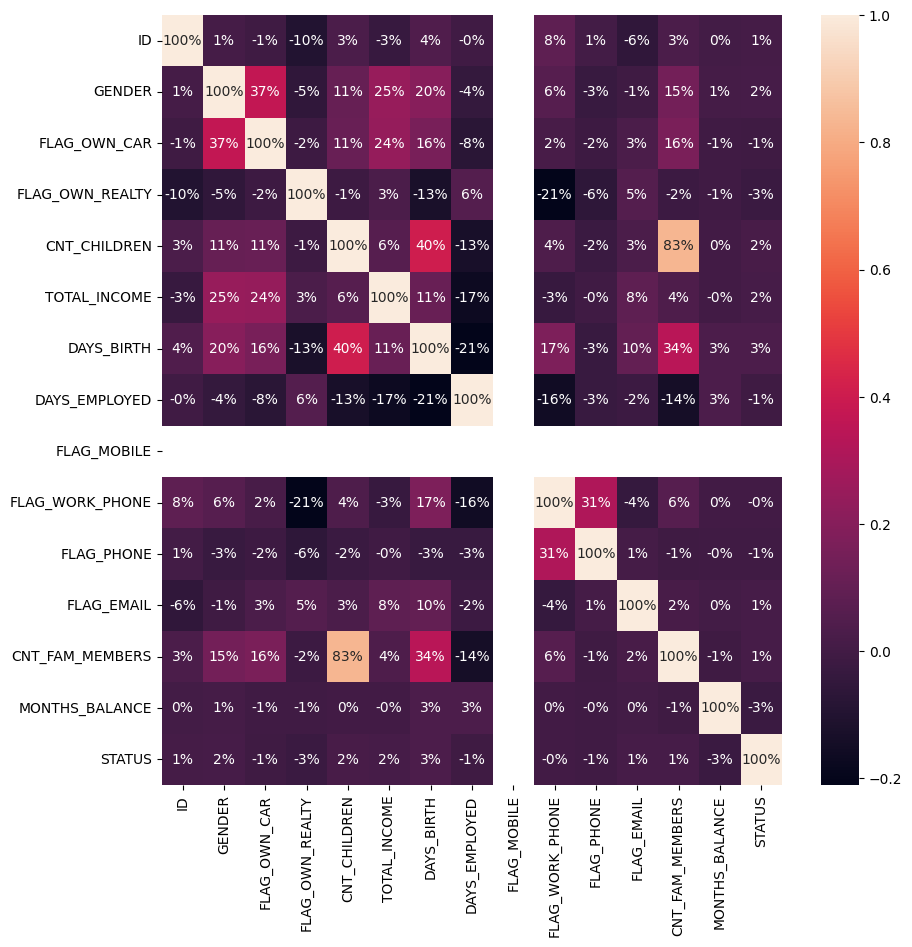

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method='spearman'), annot=True, fmt='.0%')
plt.show()

### Dropping unnecessary columns

In [28]:
df.drop(labels=['FLAG_MOBILE', 'CNT_CHILDREN', 'DAYS_BIRTH', 'FLAG_WORK_PHONE', 'FLAG_EMAIL'], axis=1, inplace=True)

In [29]:
df.drop(labels=['ID'], axis=1, inplace=True)

In [ ]:
df.head()

,GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,TOTAL_INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_STATUS,HOUSING_TYPE,DAYS_EMPLOYED,FLAG_PHONE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,1,1,1,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,0,2.0,0,1
1,1,1,1,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,0,2.0,-1,1
2,1,1,1,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,0,2.0,-2,1
3,1,1,1,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,0,2.0,-3,1
4,1,1,1,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,0,2.0,-4,1


### Correlation after dropping unnecessary Columns

### Dealing with Datatypes

In [30]:
df.dtypes

GENDER               int64
FLAG_OWN_CAR         int64
FLAG_OWN_REALTY      int64
TOTAL_INCOME       float64
INCOME_TYPE         object
EDUCATION_TYPE      object
FAMILY_STATUS       object
HOUSING_TYPE        object
DAYS_EMPLOYED      float64
FLAG_PHONE         float64
CNT_FAM_MEMBERS    float64
MONTHS_BALANCE       int64
STATUS               int64
dtype: object

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [32]:
df.dtypes

GENDER               int64
FLAG_OWN_CAR         int64
FLAG_OWN_REALTY      int64
TOTAL_INCOME       float64
INCOME_TYPE          int64
EDUCATION_TYPE       int64
FAMILY_STATUS        int64
HOUSING_TYPE         int64
DAYS_EMPLOYED      float64
FLAG_PHONE         float64
CNT_FAM_MEMBERS    float64
MONTHS_BALANCE       int64
STATUS               int64
dtype: object

### Statistical Measures

In [33]:
print('TOTAL_INCOME: {0}'.format(df.TOTAL_INCOME.mean())) # mean
print('TOTAL_INCOME : {0}'.format(df.TOTAL_INCOME.median())) # median

TOTAL_INCOME: 188544.24237948307
TOTAL_INCOME : 162000.0


### Checking for outliers

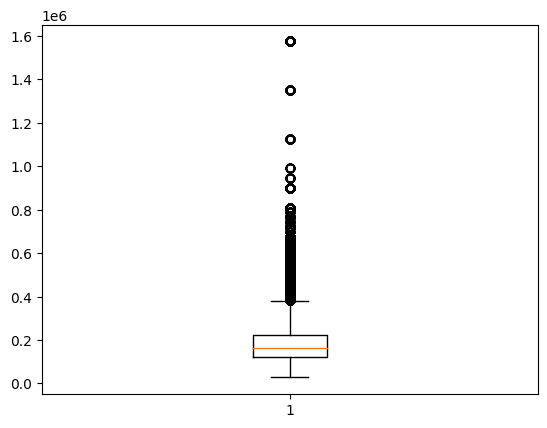

In [34]:
plt.boxplot(df['TOTAL_INCOME'])
plt.show()

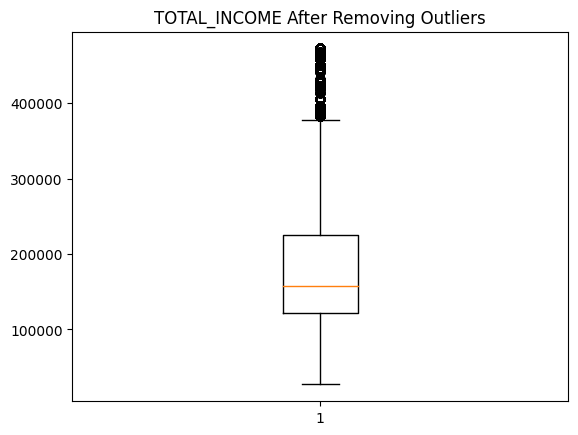

In [35]:
zscores = (df['TOTAL_INCOME'] - df['TOTAL_INCOME'].mean()) / df['TOTAL_INCOME'].std()
df = df.loc[abs(zscores) <= 3]

plt.boxplot(df['TOTAL_INCOME'])
plt.title('TOTAL_INCOME After Removing Outliers')
plt.show()

Handling Date Values in Columns

In [36]:
import datetime
from datetime import timedelta
def emp_date(total_days):
    today = datetime.date.today()
    date_employed = (today + timedelta(days=total_days)).strftime('%Y-%m-%d')
    return date_employed

In [37]:
df['DAYS_EMPLOYED']=df['DAYS_EMPLOYED'].apply(emp_date)

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [39]:
df.dtypes

GENDER               int64
FLAG_OWN_CAR         int64
FLAG_OWN_REALTY      int64
TOTAL_INCOME       float64
INCOME_TYPE          int64
EDUCATION_TYPE       int64
FAMILY_STATUS        int64
HOUSING_TYPE         int64
DAYS_EMPLOYED        int64
FLAG_PHONE         float64
CNT_FAM_MEMBERS    float64
MONTHS_BALANCE       int64
STATUS               int64
dtype: object

# **PHASE 2 : MODEL BUILDING AND VISUALIZATION**

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler


In [41]:
%config InlineBackend.figure_format = 'svg'
from imblearn.over_sampling import SMOTE
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression

In [42]:
y=df['STATUS'].values
X=df.drop('STATUS', axis=1).values

In [43]:
print(X.shape)
print(y.shape)

(757691, 12)
(757691,)


In [44]:
X_balance,y_balance = SMOTE().fit_resample(X,y)
print(X_balance.shape)
print(y_balance.shape)

(1318966, 12)
(1318966,)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_balance,y_balance, test_size=0.2,random_state = 100)

In [46]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Model I : LOGISTIC REGRESSION**

In [48]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_predict_lr = model_lr.predict(X_test)
lr_acc =accuracy_score(y_test, y_predict_lr)
print('Accuracy Score is {:.3}'.format(accuracy_score(y_test, y_predict_lr)))
print('F1 Score is {:.3}'.format(f1_score(y_test, y_predict_lr)))
print('Precission Score is {:.3}'.format(precision_score(y_test, y_predict_lr)))
print('Recall Score is {:.3}'.format(recall_score(y_test, y_predict_lr)))

Accuracy Score is 0.529
F1 Score is 0.519
Precission Score is 0.53
Recall Score is 0.508


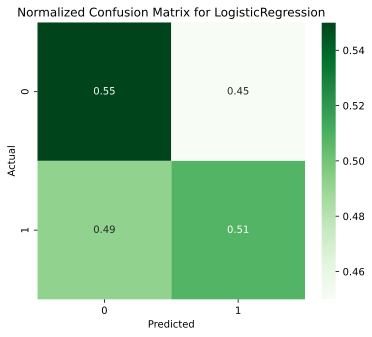

In [49]:
cm = confusion_matrix(y_test, y_predict_lr)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(cm_norm, annot=True, cmap="Greens")
ax.set(title="Normalized Confusion Matrix for LogisticRegression",
       xlabel="Predicted",
       ylabel="Actual")
plt.show()

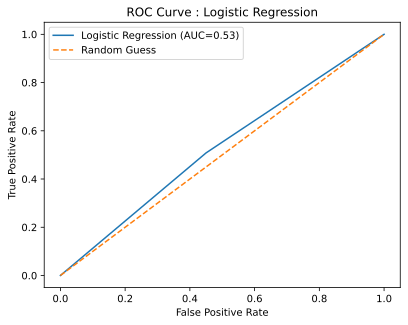

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
fp, tp, thresholds = roc_curve(y_test, y_predict_lr)
auc = roc_auc_score(y_test, y_predict_lr)
plt.plot(fp, tp, label=f'Logistic Regression (AUC={auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve : Logistic Regression')
plt.legend()
plt.show()

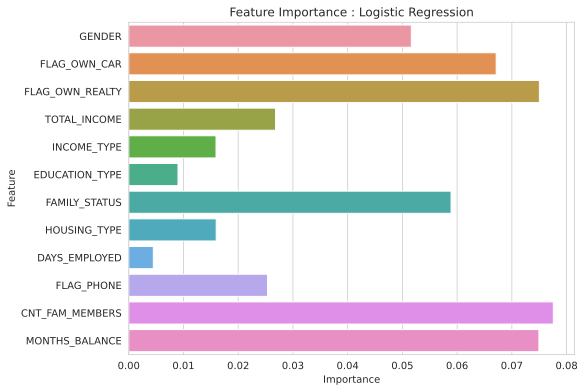

In [51]:
feature_names = ['GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'TOTAL_INCOME','INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_STATUS', 'HOUSING_TYPE','DAYS_EMPLOYED', 'FLAG_PHONE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE']
importance_scores = abs(model_lr.coef_[0])
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance_scores})
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance, ax=ax, orient='h')
plt.title('Feature Importance : Logistic Regression')
plt.show()

**MODEL II : DECISION TREE CLASSIFIER**

In [52]:
from sklearn.tree import DecisionTreeClassifier
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train, y_train)
y_predict_dtc = model_dtc.predict(X_test)
dtc_acc=accuracy_score(y_test, y_predict_dtc)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict_dtc)))
print('F1 Score is {:.3}'.format(f1_score(y_test, y_predict_dtc)))
print('Precission Score is {:.3}'.format(precision_score(y_test, y_predict_dtc)))
print('Recall Score is {:.3}'.format(recall_score(y_test, y_predict_dtc)))

Accuracy Score is 0.90512
F1 Score is 0.905
Precission Score is 0.908
Recall Score is 0.901


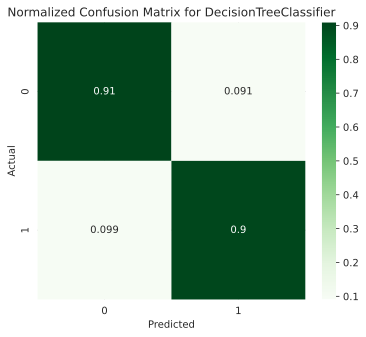

In [54]:
cm = confusion_matrix(y_test, y_predict_dtc)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(cm_norm, annot=True, cmap="Greens")
ax.set(title="Normalized Confusion Matrix for DecisionTreeClassifier",
       xlabel="Predicted",
       ylabel="Actual")
plt.show()

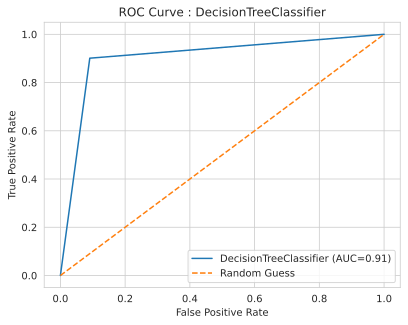

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
fp, tp, thresholds = roc_curve(y_test, y_predict_dtc)
auc = roc_auc_score(y_test, y_predict_dtc)
plt.plot(fp, tp, label=f'DecisionTreeClassifier (AUC={auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve : DecisionTreeClassifier')
plt.legend()
plt.show()

**MODEL III : RANDOM FOREST CLASSIFIER**

In [57]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)
y_predict_rfc = model_rfc.predict(X_test)
rfc_acc=accuracy_score(y_test, y_predict_rfc)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict_rfc)))
print('F1 Score is {:.3}'.format(f1_score(y_test, y_predict_rfc)))
print('Precission Score is {:.3}'.format(precision_score(y_test, y_predict_rfc)))
print('Recall Score is {:.3}'.format(recall_score(y_test, y_predict_rfc)))

Accuracy Score is 0.91328
F1 Score is 0.913
Precission Score is 0.918
Recall Score is 0.907


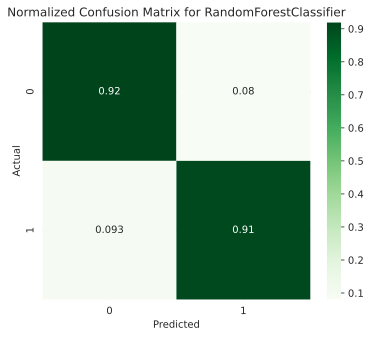

In [59]:
cm = confusion_matrix(y_test, y_predict_rfc)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(cm_norm, annot=True, cmap="Greens")
ax.set(title="Normalized Confusion Matrix for RandomForestClassifier",
       xlabel="Predicted",
       ylabel="Actual")
plt.show()

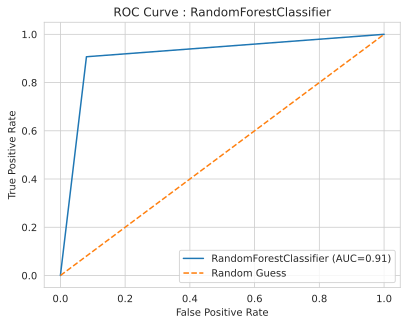

In [60]:
fp, tp, thresholds = roc_curve(y_test, y_predict_rfc)
auc = roc_auc_score(y_test, y_predict_rfc)
plt.plot(fp, tp, label=f'RandomForestClassifier (AUC={auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve : RandomForestClassifier')
plt.legend()
plt.show()

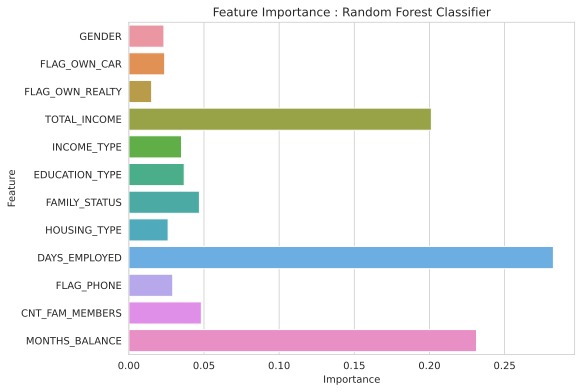

In [61]:
importance_scores = model_rfc.feature_importances_
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance_scores})
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance, ax=ax, orient='h')
plt.title('Feature Importance : Random Forest Classifier')
plt.show()

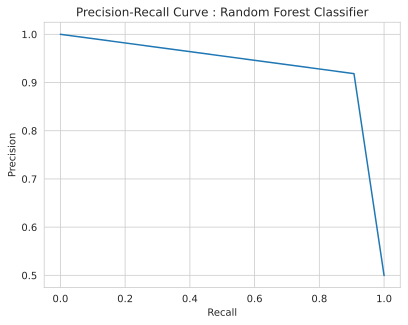

In [87]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_predict_rfc)
plt.plot(recall, precision)
plt.title('Precision-Recall Curve : Random Forest Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

**MODEL IV : KNEIGHBORS CLASSIFIER**

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_predict_knn = model_knn.predict(X_test)
knn_acc= accuracy_score(y_test, y_predict_knn)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict_knn)))
print('F1 Score is {:.3}'.format(f1_score(y_test, y_predict_knn)))
print('Precission Score is {:.3}'.format(precision_score(y_test, y_predict_knn)))
print('Recall Score is {:.3}'.format(recall_score(y_test, y_predict_knn)))

Accuracy Score is 0.89939
F1 Score is 0.901
Precission Score is 0.889
Recall Score is 0.913


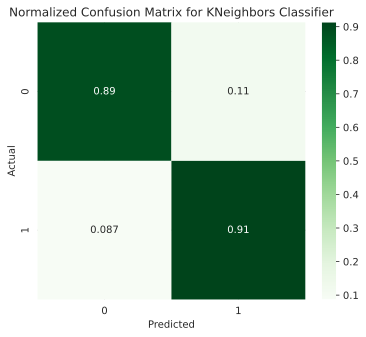

In [63]:
cm = confusion_matrix(y_test, y_predict_knn)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(cm_norm, annot=True, cmap="Greens")
ax.set(title="Normalized Confusion Matrix for KNeighbors Classifier",
       xlabel="Predicted",
       ylabel="Actual")
plt.show()

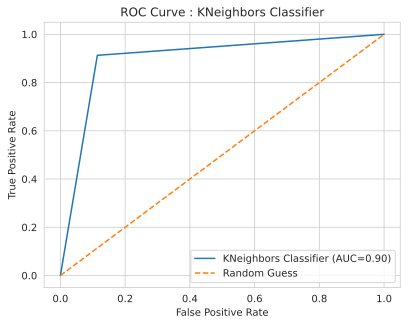

In [64]:
fp, tp, thresholds = roc_curve(y_test, y_predict_knn)
auc = roc_auc_score(y_test, y_predict_knn)
plt.plot(fp, tp, label=f'KNeighbors Classifier (AUC={auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve : KNeighbors Classifier')
plt.legend()
plt.show()

**MODEL V : XGBOOST CLASSIFIER**

In [65]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
y_predict_xgb = model_xgb.predict(X_test)
xgb_acc=accuracy_score(y_test, y_predict_xgb)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict_xgb)))
print('F1 Score is {:.3}'.format(f1_score(y_test, y_predict_xgb)))
print('Precission Score is {:.3}'.format(precision_score(y_test, y_predict_xgb)))
print('Recall Score is {:.3}'.format(recall_score(y_test, y_predict_xgb)))

Accuracy Score is 0.88404
F1 Score is 0.872
Precission Score is 0.973
Recall Score is 0.79


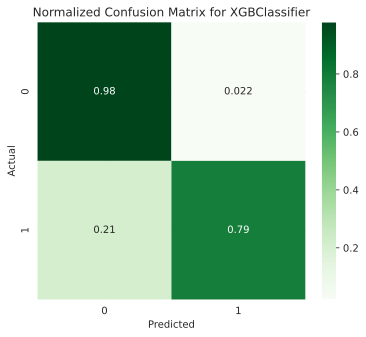

In [66]:
cm = confusion_matrix(y_test, y_predict_xgb)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(cm_norm, annot=True, cmap="Greens")
ax.set(title="Normalized Confusion Matrix for XGBClassifier",
       xlabel="Predicted",
       ylabel="Actual")
plt.show()

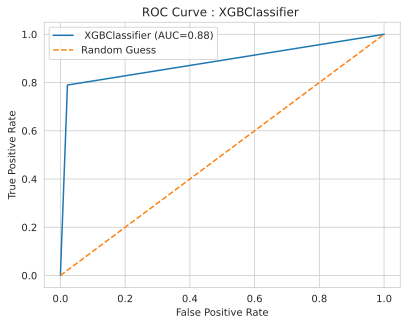

In [67]:
fp, tp, thresholds = roc_curve(y_test, y_predict_xgb)
auc = roc_auc_score(y_test, y_predict_xgb)
plt.plot(fp, tp, label=f' XGBClassifier (AUC={auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve : XGBClassifier ')
plt.legend()
plt.show()


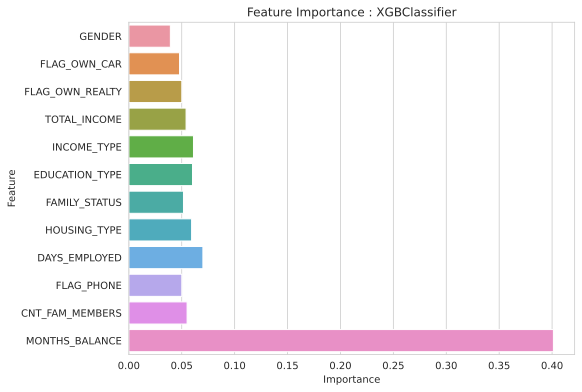

In [69]:
importance_scores = model_xgb.feature_importances_
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance_scores})
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance, ax=ax, orient='h')
plt.title('Feature Importance : XGBClassifier')
plt.show()

# **Comparision of Accuracies**

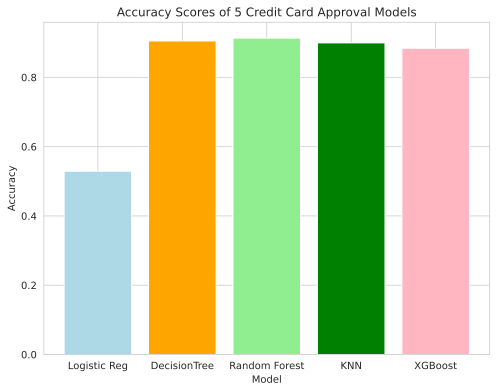

In [85]:
model = [ 'Logistic Reg', 'DecisionTree','Random Forest','KNN','XGBoost']
accuracy= [lr_acc, dtc_acc, rfc_acc, knn_acc ,xgb_acc]
colors = ['lightblue', 'orange', 'lightgreen', 'green', 'lightpink']
plt.figure(figsize=(8,6))
plt.bar(model, accuracy,color=colors)
plt.title('Accuracy Scores of 5 Credit Card Approval Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()